<a id="top"></a>
# Surveying dust structure via GALEX MIS - Part 1 - SOLUTIONS
***

Solutions proposed for Part 1. 

## Imports

- `astropy` to use tools needed for performing astronomy and astrophysics with Python, including handling fits files, defining coordinates or choosing the right limits for image visualization.
- `Observations` from _astroquery.mast_ to query the Barbara A. Mikulski Archive for Space Telescopes (MAST).
- `os` to  use operating system dependent functionality, such as unzipping files.
- `matplotlib` to visualize images.
- `numpy` to manipulate arrays.

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.mast import Observations
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.visualization import ZScaleInterval
import numpy as np

## Exercises

Now that we have seen the whole process, let's try to do the same for a different target from the MBM catalog. Let's study now the molecular cloud LDN 1569.

Let's start again with the coordinates that SIMBAD provides for the [molecular cloud LDN 1569](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=ldn+1569&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id) (Gal. coordinates, ep = J2000):

- Galactic longitude: 189.1050 deg
- Galactic latitude: -36.0158 deg

### 1. Coordinate query and data downloading

Following the steps shown before, transform the coordinates from the Galactic frame to the ICRS, perform a query in the GALEX MIS database and download the UV intensity map corresponding to the coordinates provided.

In [21]:
coord_gal = SkyCoord(189.1050, -36.0158, unit='deg', frame='galactic')
coord_icrs = coord_gal.transform_to('icrs')
obs = Observations.query_criteria(obs_collection="GALEX",coordinates=coord_icrs,project='MIS',radius="0.5 deg")
data_products = Observations.get_product_list(obs)
data_products_mrp = Observations.filter_products(data_products, productType='SCIENCE',productGroupDescription='Minimum Recommended Products')
yourProd = data_products_mrp[0]
table = Observations.download_products(yourProd, mrp_only = False, cache = False) 
table

Local Path,Status,Message,URL
str74,str8,object,object
./mastDownload/GALEX/3786509276353134592/MISGCSS_26703_0416-fd-int.fits.gz,COMPLETE,None,None


### 2. Unzip the file and retrieve the information from the _.fits_ file

As we also saw before, the files in the GALEX database can be zipped in the form of _.gz_ files. First unzip the download file, and then retrieve the pertaining information contained in the _.fits_ file. Remember that we will need to use both the actual image and the information contained in the header!

In [14]:
filename = table['Local Path'][0]
os.system("gunzip " + filename)

0

In [22]:
fits.info(filename[:-3])

Filename: ./mastDownload/GALEX/3786509276353134592/MISGCSS_26703_0416-fd-int.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     122   (3840, 3840)   float32   


In [23]:
with fits.open(filename[:-3]) as hdulist: 
    header = hdulist[0].header
    image = hdulist[0].data

### 3. Coordinate limits

Using the knowledge about the header information from before, calculate what will be the coordinate limits of our image for both the RA and Dec axes.

In [24]:
naxis1 = header['NAXIS1']
naxis2 = header['NAXIS2']
cdelt1 = header['CDELT1']
cdelt2 = header['CDELT2']
crpix1 = header['CRPIX1']
crpix2 = header['CRPIX2']
crval1 = header['CRVAL1']
crval2 = header['CRVAL2']

# Initial RA - Pixel 1
RA1 = crval1 - (crpix1-1)*cdelt1/np.cos(crval2*(2*np.pi/360.0))
# Final RA - Last Pixel 
RAf = crval1 + (naxis1+1-crpix1)*cdelt1/np.cos(crval2*(2*np.pi/360.0))

# Initial Dec - Pixel 1
Dec1 = crval2 - (crpix2-1)*cdelt2
# Final Dec - Last Pixel 
Decf = crval2 + (naxis2+1-crpix2)*cdelt2

### 4. Define vmin and vmax for the image display

Let's use now `ZScaleInterval` and a central part of the image to decide the contrast that we will use on our image.

In [25]:
cut = image[1850:-1850,1850:-1850]
interval = ZScaleInterval(nsamples=cut.size, contrast=1, max_reject=0.5)
vmin, vmax = interval.get_limits(cut)

print('Limits for image: vmin = ',vmin,', vmax = ',vmax)

Limits for image: vmin =  8.87002119348896e-05 , vmax =  0.001963219570294989


### 5. Display the final image

Now that you have all the ingredients, let's display the final image! Do not forget to include a colorbar with the proper units.

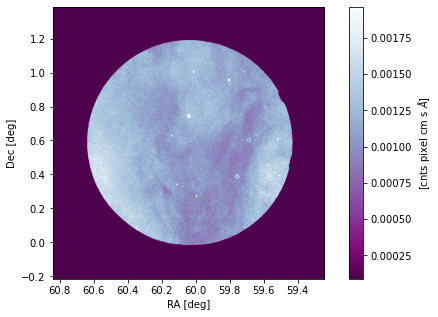

In [28]:
plt.figure(figsize=(9,5))
plt.imshow(image, extent=[RA1,RAf,Dec1,Decf], vmin=vmin, vmax=vmax, cmap='BuPu_r',origin='lower')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.colorbar(label='[cnts pixel cm s $\AA$]')
plt.show()

This image corresponds to a part of the molecular cloud LDN 1569 or MBM 18. This molecular cloud also belong to the Orion-Eridanus superbubble, but to the north rim in comparison with MBM 15 which is part of the west rim. For more information regarding this please refer to [Joubaud et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019A%26A...631A..52J/abstract).

## Additional Resources

For more information about the MAST archive and details about the tutorial: 

* <a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> <br>
* <a href="https://galex.stsci.edu/GR6/">GALEX via MAST</a> <br>

## About this Notebook

**Author**: Clara Puerto Sánchez <br>
**Keyword(s)**: Tutorial, mosaic, dust <br>
**Last Updated**: Sep 2022 <br>
**Next review**: Apr 2023

For support, please contact the Archive HelpDesk at archive@stsci.edu.
***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>